### RusNews


In [415]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [416]:
from datasets import load_dataset
import pandas as pd

In [417]:
dataset = load_dataset("toloka/VoxDIY-RusNews")

  0%|          | 0/1 [00:00<?, ?it/s]

In [418]:
df = dataset['train'].to_pandas()

In [419]:
df.head(10)

,task,transcriptions,performers,gt
0,https://tlk.s3.yandex.net/annotation_tasks/rus...,это видимо продолжении кампании израиля по пре...,8 | 3200 | 3058 | 2702 | 2763 | 953 | 1573,это видимо продолжение кампании израиля по пре...
1,https://tlk.s3.yandex.net/annotation_tasks/rus...,сенатский комитет по разведке вчера одобрил за...,268 | 552 | 330 | 135 | 1186 | 1978 | 1111,сенатский комитет по разведке вчера одобрил за...
2,https://tlk.s3.yandex.net/annotation_tasks/rus...,мы изучаем все возможные варианты | мы изучаем...,50 | 3181 | 1638 | 77 | 1657 | 2395 | 2377,мы изучаем все возможные варианты
3,https://tlk.s3.yandex.net/annotation_tasks/rus...,приоритет будет отдан российскому специалисту ...,118 | 2085 | 2395 | 1027 | 3078 | 1014 | 352,приоритет будет отдан российскому специалисту
4,https://tlk.s3.yandex.net/annotation_tasks/rus...,заметно отстают от него другие ушедшие из жизн...,3007 | 2271 | 2138 | 2040 | 2044 | 2508 | 2159,заметно отстают от него другие ушедшие из жизн...
5,https://tlk.s3.yandex.net/annotation_tasks/rus...,в список так же попали мэрлин монро джон ленон...,1743 | 784 | 1014 | 1572 | 744 | 2187 | 1208,в список также попали мэрилин монро джон ленно...
6,https://tlk.s3.yandex.net/annotation_tasks/rus...,защитник юверноса леонардо банучи не поможет к...,897 | 1688 | 1111 | 2508 | 2913 | 2541 | 87,защитник ювентуса леонардо бонуччи не поможет ...
7,https://tlk.s3.yandex.net/annotation_tasks/rus...,также он примут участие в поединке с пармой ли...,2349 | 3176 | 393 | 1501 | 2669 | 2044 | 3141,также не примут участие в поединке с пармой ли...
8,https://tlk.s3.yandex.net/annotation_tasks/rus...,а форвард фабио квальярелла восстановился и го...,2534 | 953 | 1667 | 2110 | 2223 | 2702 | 1881,а форвард фабио квальярелла восстановился посл...
9,https://tlk.s3.yandex.net/annotation_tasks/rus...,динамо организует для болельщиков бесплатную э...,87 | 393 | 2166 | 395 | 2025 | 1641 | 744,динамо организует для болельщиков бесплатную э...


In [420]:
df = df.drop('task',axis=1)
df = df.drop('performers', axis=1)
df = df.drop('transcriptions', axis=1)

In [421]:
df

,gt
0,это видимо продолжение кампании израиля по пре...
1,сенатский комитет по разведке вчера одобрил за...
2,мы изучаем все возможные варианты
3,приоритет будет отдан российскому специалисту
4,заметно отстают от него другие ушедшие из жизн...
...,...
3086,футбол придется запрещать по всей стране
3087,директор югры андрей бельмач отметил что пока ...
3088,этот пост стал вакантным после отставки сергея...
3089,может день


In [422]:
df['labels'] = 1

In [423]:
shuffled = df.sample(n=1200)

In [424]:
shuffled.labels.value_counts()

1    1200
Name: labels, dtype: int64

In [425]:
shuffled.reset_index(drop=True , inplace= True )

In [426]:
shuffled.rename(columns = {'gt': 'message'}, inplace = True)

In [427]:
news = shuffled

In [428]:
news

,message,labels
0,но важно уточнить что усовершенствование и улу...,1
1,однажды темный правитель сарлак решил убить св...,1
2,в течение дня лишь было транслировано в зале д...,1
3,есть гораздо менее дорогие и менее навязчивые ...,1
4,в первой лиге лион забрал у нас место лидера,1
...,...,...
1195,на счету бразильца два гола и три результативн...,1
1196,она не применяется для определения глубины объ...,1
1197,по ее словам на пхукете григорий лепс не живет...,1
1198,поисковики в интернете выводят на сайты и груп...,1


In [429]:
df_spam = pd.read_csv('spam.csv')

In [430]:
df_spam

,text,Unnamed: 1,Unnamed: 2,spam
0,Subject: naturally irresistible your corporate...,"Тема: Естественно неотразимо, что ваша корпора...",NaN,1
1,Subject: the stock trading gunslinger fanny i...,Тема: Торговый орудийщик торговли фондом - это...,NaN,1
2,Subject: unbelievable new homes made easy im ...,"Тема: Невероятные новые дома, упрощенные, я же...",NaN,1
3,Subject: 4 color printing special request add...,Тема: 4 Цветная печать Специальный запрос Допо...,NaN,1
4,"Subject: do not have money , get software cds ...","Тема: нет денег, получите программные компакт ...",NaN,1
...,...,...,...,...
5724,Subject: re : research and development charges...,NaN,NaN,0
5725,"Subject: re : receipts from visit jim , than...",NaN,NaN,0
5726,Subject: re : enron case study update wow ! a...,NaN,NaN,0
5727,"Subject: re : interest david , please , call...",NaN,NaN,0


In [431]:
df_spam.drop('text', axis=1, inplace=True)

In [432]:
df_spam.drop('Unnamed: 2', axis=1, inplace=True)

In [433]:
df_spam.rename({'Unnamed: 1':'message', 'spam':'labels'}, axis='columns', inplace=True)

In [434]:
df_spam.dropna(axis=0, inplace=True)

In [435]:
df_spam

,message,labels
0,"Тема: Естественно неотразимо, что ваша корпора...",1
1,Тема: Торговый орудийщик торговли фондом - это...,1
2,"Тема: Невероятные новые дома, упрощенные, я же...",1
3,Тема: 4 Цветная печать Специальный запрос Допо...,1
4,"Тема: нет денег, получите программные компакт ...",1
...,...,...
2662,"Тема: AGA для 6/16 / 00 прогнозируется в 82, я...",0
2663,"Тема: Подтверждение встречи Винса: Спасибо, чт...",0
2664,"Тема: Rerishnarao, Pinnamaneni V Обзор Я сдела...",0
2665,"Тема: Re: исследовательский обед, который я бы...",0


In [436]:
df_spam.message.replace(to_replace=r'Тема:', value='', regex=True, inplace=True)

In [437]:
df_spam.message.replace(to_replace=r'Re:', value='', regex=True, inplace=True)

In [438]:
df_spam

,message,labels
0,"Естественно неотразимо, что ваша корпоративна...",1
1,Торговый орудийщик торговли фондом - это Merr...,1
2,"Невероятные новые дома, упрощенные, я желаю п...",1
3,4 Цветная печать Специальный запрос Дополните...,1
4,"нет денег, получите программные компакт -диск...",1
...,...,...
2662,"AGA для 6/16 / 00 прогнозируется в 82, я буду...",0
2663,"Подтверждение встречи Винса: Спасибо, что пре...",0
2664,"Rerishnarao, Pinnamaneni V Обзор Я сделал оши...",0
2665,"исследовательский обед, который я бы очень х...",0


In [439]:
df_spam.labels[df_spam.labels == '1'] = 2

In [440]:
df_spam.reset_index(drop=True , inplace= True )

In [441]:
df_spam.labels.value_counts()

2                                                                                               1366
0                                                                                               1297
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: labels, dtype: int64

In [442]:
spam = df_spam[df_spam.labels == 2]

In [443]:
spam.reset_index(drop=True , inplace= True )

In [444]:
spam

,message,labels
0,"Естественно неотразимо, что ваша корпоративна...",2
1,Торговый орудийщик торговли фондом - это Merr...,2
2,"Невероятные новые дома, упрощенные, я желаю п...",2
3,4 Цветная печать Специальный запрос Дополните...,2
4,"нет денег, получите программные компакт -диск...",2
...,...,...
1361,Вы готовы получить это? привет ! Виагра - это...,2
1362,Хотите газовую карту за 250 долларов? Не позв...,2
1363,"Необходимый ответ нужен Уважаемый сэр, я д -р...",2
1364,"Хотите увидеть, как я кустак? Fist Bang покаж...",2


In [445]:
spam.labels.astype(int)

0       2
1       2
2       2
3       2
4       2
       ..
1361    2
1362    2
1363    2
1364    2
1365    2
Name: labels, Length: 1366, dtype: int64

In [446]:
not_spam = df_spam[df_spam.labels == '0']

In [447]:
not_spam

,message,labels
123,"Посмотрите, что Сэнди делает в своем общежити...",0
1367,"Здравствуйте, ребята, я «БУГОВАЯ ВАС» для ваш...",0
1368,Станция метеорологической станции Sacramento ...,0
1369,Из Enron India Newsdesk - 18 января Newsclips...,0
1370,"Powerisk 2001 - Ваше приглашение Анжелика, с...",0
...,...,...
2660,"AGA для 6/16 / 00 прогнозируется в 82, я буду...",0
2661,"Подтверждение встречи Винса: Спасибо, что пре...",0
2662,"Rerishnarao, Pinnamaneni V Обзор Я сделал оши...",0
2663,"исследовательский обед, который я бы очень х...",0


In [448]:
not_spam.reset_index(drop=True , inplace= True )

In [449]:
not_spam.labels.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1292    0
1293    0
1294    0
1295    0
1296    0
Name: labels, Length: 1297, dtype: int64

In [450]:
frames = [news, spam, not_spam]

r = pd.concat(frames)

In [451]:
r = r.sample(frac=1)

In [452]:
r.reset_index(drop=True, inplace= True)

In [453]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863 entries, 0 to 3862
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  3863 non-null   object
 1   labels   3863 non-null   object
dtypes: object(2)
memory usage: 60.5+ KB


In [454]:
r.labels = r.labels.astype(int)

<Axes: xlabel='labels', ylabel='Count'>

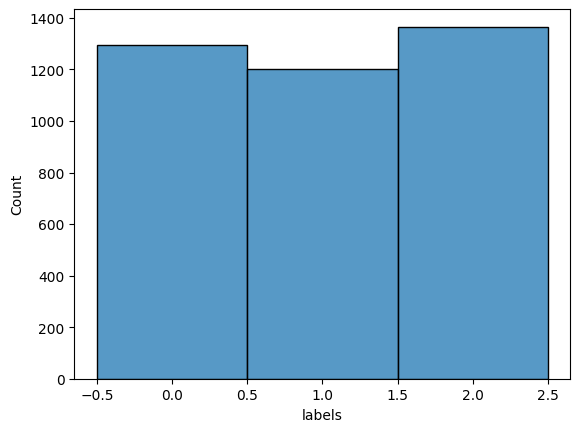

In [455]:
import seaborn as sns
sns.histplot(data=r, x="labels", stat="count", discrete=True)

# r.labels.hist()

In [456]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [457]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
r['labels'] = encoder.fit_transform(r['labels'])

In [458]:
r['message'] = r['message'].apply(lambda x : x.lower())

In [459]:
# df['emails'] = df['emails'].apply(lambda x:x.replace('\n',''))
# df['emails'] = df['emails'].apply(lambda x:x.replace('\t',''))

In [460]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863 entries, 0 to 3862
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  3863 non-null   object
 1   labels   3863 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.5+ KB


In [461]:
lemm = WordNetLemmatizer()
processed_text = []
nltk.download('omw-1.4')

for i in range(len(r)) :
    
    text = re.sub('^a-zA-z',' ',r['message'][i])
    words = text.split()
    words = [lemm.lemmatize(word) for word in words if word not in set(stopwords.words('russian'))]
    text_p = ' '.join(words)
    processed_text.append(text_p)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [462]:
cv = CountVectorizer()
X = cv.fit_transform(processed_text).toarray()

In [463]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [464]:
y = r['labels']

In [465]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [466]:
X_test[0]

array([2, 0, 0, ..., 0, 0, 0])

In [467]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [468]:
model.fit(X_train,y_train)

MultinomialNB()

In [469]:
y_pred = model.predict(X_test)

In [470]:
y_pred

array([0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2,
       2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 2,
       0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2,

In [471]:
# Check accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8965071151358344

In [472]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
CM 

array([[250,   0,   3],
       [ 25, 173,  47],
       [  2,   3, 270]])

In [473]:
! pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [480]:
import pickle
# save the classifier
with open('model_clf.pkl', 'wb') as fid:
    pickle.dump(model, fid)    

# # load it again
# with open('model_clf.pkl', 'rb') as fid:
#     model_loaded = pickle.load(fid)

In [475]:
def preprocess_input(user_input:str):
    cv = CountVectorizer()
    return cv.fit_transform(processed_text).toarray()

In [476]:
a = r.message[0]
test_vec = cv.transform([a])

In [477]:
model.predict(test_vec)[0]

1

In [478]:
with open('cv.pk', 'wb') as fin:
  pickle.dump(cv, fin)

In [479]:
with open('model.pkl', 'wb') as fin:
  pickle.dump(model, fin)